In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/widsdatathon2021data/SampleSubmissionWiDS2021.csv
/kaggle/input/widsdatathon2021data/SolutionTemplateWiDS2021.csv
/kaggle/input/widsdatathon2021data/DataDictionaryWiDS2021.csv
/kaggle/input/widsdatathon2021data/UnlabeledWiDS2021.csv
/kaggle/input/widsdatathon2021data/TrainingWiDS2021.csv


In [92]:
# Load data
train_df = pd.read_csv("../input/widsdatathon2021data/TrainingWiDS2021.csv")
test_df = pd.read_csv("../input/widsdatathon2021data/UnlabeledWiDS2021.csv")
data_dictionary_df = pd.read_csv("../input/widsdatathon2021data/DataDictionaryWiDS2021.csv")

train_df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


### Drop unnamed first column, encounter_id and hospital_id

In [93]:
train_df.drop(columns=["Unnamed: 0", "encounter_id", "hospital_id"], axis=1, inplace=True)
test_submission = pd.DataFrame(test_df["encounter_id"])
test_df.drop(columns=["Unnamed: 0", "encounter_id", "hospital_id"], axis=1, inplace=True)
train_df.head()

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,...,NaN,NaN,0,0,0,0,0,0,0,1
1,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,...,51.0,51.0,0,0,0,0,0,0,0,1
2,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,...,NaN,NaN,0,0,0,0,0,0,0,0
3,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,...,337.0,337.0,0,0,0,0,0,0,0,0
4,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,...,NaN,NaN,0,0,0,0,0,0,0,0


In [94]:
print(f'Training dataset shape: {train_df.shape}')
print(f'Training dataset shape: {test_df.shape}')

Training dataset shape: (130157, 178)
Training dataset shape: (10234, 177)


### Drop duplicate rows

In [95]:
l0 = train_df.shape[0]
train_df.drop_duplicates(inplace=True)
l1 = train_df.shape[0]
print(f'{l0-l1} rows were dropped.')

8 rows were dropped.


### Check proportion of missing values in each column 

In [96]:
def count_missing_values(dataframe):
    
    total = dataframe.isnull().sum()
    percent = (dataframe.isnull().sum())*100/(len(dataframe))
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data['Total']>0]
    missing_data.sort_values('Total', ascending=False, inplace=True)
    print(missing_data)
    
    return 

count_missing_values(train_df)

                   Total    Percent
h1_bilirubin_min  119853  92.089067
h1_bilirubin_max  119853  92.089067
h1_albumin_max    118997  91.431359
h1_albumin_min    118997  91.431359
h1_lactate_max    118459  91.017987
...                  ...        ...
d1_sysbp_min         263   0.202076
d1_heartrate_max     254   0.195161
d1_heartrate_min     254   0.195161
icu_admit_source     232   0.178257
gender                58   0.044564

[160 rows x 2 columns]


160 out of 177 features have missing values. The highest proportion of missing values in a column is >92%.

In [97]:
train_df['diabetes_mellitus'].isnull().sum()

0

The target variable does not have any missing values.

### Drop columns having more than a certain percentage of missing values

In [98]:
thr = 0.8
to_drop = train_df.columns[train_df.isnull().sum()>thr*len(train_df)]
train_df.drop(columns=to_drop, axis=1, inplace=True)
test_df.drop(columns=to_drop, axis=1, inplace=True)
train_df.shape

(130149, 146)

### Compute pair-wise correlation between numeric columns and drop one if this is greater than a threshold

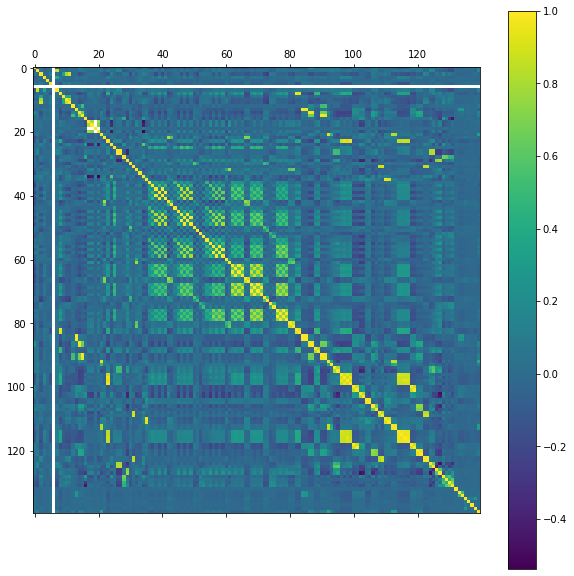

In [99]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10, 10))
plt.matshow(train_df.corr(), fignum=f.number)
plt.colorbar()
plt.show()

In [100]:
def correlation(dataframe, threshold):
    to_drop = set() # Set of all the names of deleted columns
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in to_drop):
                column = corr_matrix.columns[i] # getting the name of column
                to_drop.add(column)

    return to_drop

to_drop = correlation(train_df, 1)
print(to_drop)

{'h1_inr_min', 'h1_inr_max', 'paco2_for_ph_apache'}


In [101]:
train_df.drop(columns=to_drop, axis=1, inplace=True)
test_df.drop(columns=to_drop, axis=1, inplace=True)
train_df.shape

(130149, 143)

### Check readmission status

In [102]:
train_df['readmission_status'].unique()

array([0])

This column has only one unique value. So we can drop it from the train and test sets.

In [103]:
train_df.drop(columns=['readmission_status'], axis=1, inplace=True)
test_df.drop(columns=['readmission_status'], axis=1, inplace=True)

### Separate categorical and numerical features

In [104]:
cat_columns = train_df.dtypes[train_df.dtypes == "object"].index.tolist()
numerical_columns = train_df.dtypes[train_df.dtypes != "object"].index.tolist()
numerical_columns.remove('diabetes_mellitus')
print(cat_columns)

['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type']


### Impute missing categorical features

In [105]:
train_df[cat_columns].isnull().sum()

ethnicity                 1579
gender                      58
hospital_admit_source    33190
icu_admit_source           232
icu_stay_type                0
icu_type                     0
dtype: int64

In [106]:
train_df['ethnicity'] = train_df['ethnicity'].fillna('Unknown')
train_df['gender'] = train_df['gender'].fillna('Unknown')
train_df['icu_admit_source'] = train_df['icu_admit_source'].fillna('Unknown')
train_df['hospital_admit_source'] = train_df['hospital_admit_source'].fillna('Unknown')

test_df['ethnicity'] = test_df['ethnicity'].fillna('Unknown')
test_df['gender'] = test_df['gender'].fillna('Unknown')
test_df['icu_admit_source'] = test_df['icu_admit_source'].fillna('Unknown')
test_df['hospital_admit_source'] = test_df['hospital_admit_source'].fillna('Unknown')

In [107]:
#train_df[cat_columns] = train_df[cat_columns].fillna(train_df[cat_columns].mode().loc[0])
#test_df[cat_columns] = test_df[cat_columns].fillna(train_df[cat_columns].mode().loc[0])

### Impute missing numerical features

Impute height and weight according to gender

In [108]:
avg_female_height = train_df[train_df.gender == 'F'].height.mean(skipna = True)
avg_male_height = train_df[train_df.gender == 'M'].height.mean(skipna = True)
avg_female_weight = train_df[train_df.gender == 'F'].weight.mean(skipna = True)
avg_male_weight = train_df[train_df.gender == 'M'].weight.mean(skipna = True)

avg_pop_height = 0.5*(avg_female_height + avg_male_height)
avg_pop_weight = 0.5*(avg_female_weight + avg_male_weight)

In [109]:
train_df["height"] = np.where((train_df.height.isna() & (train_df.gender == 'F')), 
                              avg_female_height, train_df["height"])
train_df["height"] = np.where((train_df.height.isna() & (train_df.gender == 'M')), 
                              avg_male_height, train_df["height"])
train_df["height"] = np.where((train_df.height.isna() & (train_df.gender.isna())), 
                              avg_pop_height, train_df["height"])

train_df["weight"] = np.where((train_df.weight.isna() & (train_df.gender == 'F')), 
                              avg_female_weight, train_df["weight"])
train_df["weight"] = np.where((train_df.weight.isna() & (train_df.gender == 'M')), 
                              avg_male_weight, train_df["weight"])
train_df["weight"] = np.where((train_df.weight.isna() & (train_df.gender.isna())), 
                              avg_pop_weight, train_df["weight"])

In [110]:
test_df["height"] = np.where((test_df.height.isna() & (test_df.gender == 'F')), 
                              avg_female_height, test_df["height"])
test_df["height"] = np.where((test_df.height.isna() & (test_df.gender == 'M')), 
                              avg_male_height, test_df["height"])
test_df["height"] = np.where((test_df.height.isna() & (test_df.gender.isna())), 
                              avg_pop_height, test_df["height"])

test_df["weight"] = np.where((test_df.weight.isna() & (test_df.gender == 'F')), 
                              avg_female_weight, test_df["weight"])
test_df["weight"] = np.where((test_df.weight.isna() & (test_df.gender == 'M')), 
                              avg_male_weight, test_df["weight"])
test_df["weight"] = np.where((test_df.weight.isna() & (test_df.gender.isna())), 
                              avg_pop_weight, test_df["weight"])

Impute missing blood oxygen levels with standard values

In [111]:
train_df['d1_spo2_max'] = train_df['d1_spo2_max'].fillna(95)
train_df['d1_spo2_min'] = train_df['d1_spo2_min'].fillna(90)

test_df['d1_spo2_max'] = test_df['d1_spo2_max'].fillna(95)
test_df['d1_spo2_min'] = test_df['d1_spo2_min'].fillna(90)

Impute remaining missing numerical values with medians of the respective columns

In [112]:
train_df[numerical_columns] = train_df[numerical_columns].fillna(train_df[numerical_columns].median())
test_df[numerical_columns] = test_df[numerical_columns].fillna(train_df[numerical_columns].median())

Calculate missing BMI from height and weight

In [113]:
train_df['bmi'] = (train_df['weight']*10000)/(train_df['height']**2)
test_df['bmi'] = (test_df['weight']*10000)/(test_df['height']**2)

### New features

In [114]:
#train_df['agi'] = train_df['weight']/train_df['age']
#test_df['agi'] = test_df['weight']/test_df['age']

#train_df['abmi'] = train_df['age']/train_df['bmi']#
#test_df['abmi'] = test_df['age']/test_df['bmi']

### Separate features and labels

In [115]:
train_y = train_df["diabetes_mellitus"]
train_df.drop("diabetes_mellitus", axis=1, inplace=True)

### One-hot encoding of categorical columns

In [116]:
for column in cat_columns:
    # Training data
    dummies = pd.get_dummies(train_df[column], prefix=column, drop_first=True)
    train_df = pd.concat([train_df, dummies],axis=1)
    train_df.drop(column, axis=1, inplace=True)
    # Test data
    dummies = pd.get_dummies(test_df[column], prefix=column, drop_first=True)
    test_df = pd.concat([test_df, dummies],axis=1)
    test_df.drop(column, axis=1, inplace=True)
    
# Get missing columns in the training test
missing_cols = set(train_df.columns) - set(test_df.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_df[c] = 0
    
# Ensure the order of columns in the test set is in the same order than in train set
test_df = test_df[train_df.columns]

In [117]:
train_df.shape

(130149, 172)

### SMOTE on training data

In [118]:
cat_cols = []
cat_cols_index = []
for i, col in enumerate(train_df.columns):
    if train_df[col].dtypes == np.object or train_df[col].dtypes == np.int64:
        cat_cols.append(col)
        cat_cols_index.append(i)
        
print(cat_cols)

['elective_surgery', 'icu_id', 'apache_post_operative', 'arf_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


In [119]:
#from imblearn.over_sampling import SMOTENC

#smote = SMOTENC(categorical_features = cat_cols_index, random_state = 7, sampling_strategy = 0.6)

## Transform the dataset
#train_df, train_y = smote.fit_resample(train_df, train_y)
#train_df.shape

### XGBoost Hyper-parameter tuning 

In [121]:
#from xgboost import XGBClassifier 
#from sklearn.model_selection import GridSearchCV

#xgboost = XGBClassifier(tree_method='gpu_hist', subsample=0.5, colsample_bytree=0.5, eval_metric='auc')
#params = {
#         'learning_rate': [0.1, 0.05],
#         'n_estimators': [100, 500],
#         'max_depth': [3, 6],
#          }
#clf = GridSearchCV(xgboost, params, scoring='roc_auc', cv=5, verbose=0)
#best_xgboost = clf.fit(train_df, train_y)
#print('Best learning rate:', best_xgboost.best_estimator_.get_params()['learning_rate'])
#print('Best number of estimators:', best_xgboost.best_estimator_.get_params()['n_estimators'])
#print('Best maximum depth:', best_xgboost.best_estimator_.get_params()['max_depth'])
#print('Best subsample:', best_xgboost.best_estimator_.get_params()['subsample'])
#print('Best colsample by tree:', best_xgboost.best_estimator_.get_params()['colsample_bytree'])

In [126]:
from sklearn.model_selection import KFold, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

K_FOLDS = 5

def train_model_kfold_cv(X, y, X_test):
    
    skf = StratifiedKFold(n_splits = K_FOLDS, random_state = 1, shuffle = True)
    index = 0
    model_predict = np.zeros((len(X_test), 2))
    
    for train, val in skf.split(X, y):
        
        X_train_cv, X_val_cv = X.values[train], X.values[val]
        y_train_cv, y_val_cv = y.values[train], y.values[val]
        
        xgboost = XGBClassifier(learning_rate=0.1, n_estimators=500, tree_method='gpu_hist', eval_metric='auc')
        
        print('--------------------------------------------------')
        print(f'Training on fold {index+1}')
        print('--------------------------------------------------')
        
        xgboost.fit(X_train_cv, y_train_cv)
        y_preds = xgboost.predict(X_val_cv)
        score = roc_auc_score(y_preds, y_val_cv)
        
        print(f'AUROC score on fold {index+1}: {score}')
        
        prediction = xgboost.predict_proba(X_test.values[:])
        model_predict+= prediction/K_FOLDS
        index += 1
        
    return model_predict    

In [127]:
predictions = train_model_kfold_cv(train_df, train_y, test_df)

--------------------------------------------------
Training on fold 1
--------------------------------------------------
AUROC score on fold 1: 0.75387987696682
--------------------------------------------------
Training on fold 2
--------------------------------------------------
AUROC score on fold 2: 0.7534745738901032
--------------------------------------------------
Training on fold 3
--------------------------------------------------
AUROC score on fold 3: 0.7521688475813686
--------------------------------------------------
Training on fold 4
--------------------------------------------------
AUROC score on fold 4: 0.7571380243804193
--------------------------------------------------
Training on fold 5
--------------------------------------------------
AUROC score on fold 5: 0.7643198579748354


In [128]:
test_submission["diabetes_mellitus"] = predictions[:, 1]
test_submission

,encounter_id,diabetes_mellitus
0,144740,0.058391
1,141990,0.084536
2,142038,0.095640
3,138628,0.037514
4,141682,0.441355
...,...,...
10229,143750,0.073678
10230,143813,0.067194
10231,137126,0.034888
10232,135652,0.002488


In [129]:
test_submission.to_csv("xgb_v39.csv",index=False)